## アフィン変換（平行移動）

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def affine(img, a, b, c, d, tx, ty):
    H, W, C = img.shape
    
    # temporary image
    img = np.zeros((H+2, W+2, C), dtype=np.float32)
    img[1:H+1, 1:W+1] = _img
    #周りに0パディングしたimgを作成した
    
    # get new image shape
    # 何故aとdで変換後の形が出てくるのかがわからい
    # 今回は平行移動で、拡大縮小はしない→aは１、dは１
    H_new = np.round(H*d).astype(np.int)
    W_new = np.round(W*a).astype(np.int)
    out = np.zeros((H_new+1, W_new+1, C), dtype=np.float32)
    
    # get position of new image
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)
    
    # get position of original image by affine
    # 新しい画像の座標から、元の画像の座標を求める
    abcd = a*d - b*c
    x = np.round((d*x_new - b*y_new)/abcd).astype(np.int) - tx + 1
    y = np.round((-c*x_new + a*y_new)/abcd).astype(np.int) -ty +1
    
    # これがなんのなめに必要かわからない
    x = np.minimum(np.maximum(x,0), W+1).astype(np.int)
    y = np.minimum(np.maximum(y,0), H+1).astype(np.int)
    print(type(y))
    print(y.shape)

    # assgin pixcel to new image
    # これの書き方がいまいちわかっていない
    out[y_new, x_new] =img[y,x]
    
    out = out[:H_new, :W_new]
    out = out.astype(np.uint8)
    
    return out




<class 'numpy.ndarray'>
(128, 128)


True

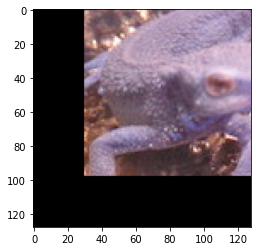

In [13]:
# read image
_img = cv2.imread('../imori.jpg').astype(np.float32)

# affine
out = affine(_img, a=1, b=0, c=0, d=1, tx=30, ty=-30)

# show image
plt.imshow(out)
# save image
cv2.imwrite('out28.jpg', out)

[[[132.  80.  67.]
  [104.  55.  39.]
  [100.  54.  36.]
  ...
  [175. 109. 110.]
  [134.  88.  70.]
  [163. 126. 100.]]

 [[140.  88.  71.]
  [117.  65.  52.]
  [106.  54.  47.]
  ...
  [177. 139. 135.]
  [176. 137. 123.]
  [152. 110.  91.]]

 [[137.  85.  69.]
  [131.  77.  66.]
  [119.  67.  60.]
  ...
  [207. 155. 148.]
  [232. 179. 159.]
  [161. 104.  82.]]

 ...

 [[231. 172. 152.]
  [153.  97.  80.]
  [160. 107.  97.]
  ...
  [107.  55.  38.]
  [101.  60.  38.]
  [ 93.  59.  36.]]

 [[255. 198. 176.]
  [172. 114.  95.]
  [168. 116. 104.]
  ...
  [150.  76.  58.]
  [119.  59.  35.]
  [112.  58.  33.]]

 [[214. 154. 130.]
  [187. 130. 109.]
  [176. 124. 112.]
  ...
  [185. 117.  94.]
  [151.  98.  71.]
  [116.  70.  39.]]]
------------------------
[[[132.  80.  67.]
  [104.  55.  39.]
  [100.  54.  36.]
  ...
  [175. 109. 110.]
  [134.  88.  70.]
  [163. 126. 100.]]

 [[140.  88.  71.]
  [117.  65.  52.]
  [106.  54.  47.]
  ...
  [177. 139. 135.]
  [176. 137. 123.]
  [152. 110.  

True

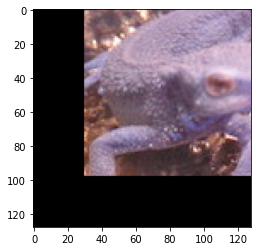

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# Affine
def affine(img, a, b, c, d, tx, ty):
    H, W, C = img.shape
    print(_img)
    print('------------------------')
    print(img)

    # temporary image
    img = np.zeros((H+2, W+2, C), dtype=np.float32)
    img[1:H+1, 1:W+1] = _img

    # get new image shape
    H_new = np.round(H * d).astype(np.int)
    W_new = np.round(W * a).astype(np.int)
    out = np.zeros((H_new+1, W_new+1, C), dtype=np.float32)

    # get position of new image
    x_new = np.tile(np.arange(W_new), (H_new, 1))
    y_new = np.arange(H_new).repeat(W_new).reshape(H_new, -1)

    # get position of original image by affine
    adbc = a * d - b * c
    x = np.round((d * x_new  - b * y_new) / adbc).astype(np.int) - tx + 1
    y = np.round((-c * x_new + a * y_new) / adbc).astype(np.int) - ty + 1

    x = np.minimum(np.maximum(x, 0), W+1).astype(np.int)
    y = np.minimum(np.maximum(y, 0), H+1).astype(np.int)

    # assgin pixcel to new image
    out[y_new, x_new] = img[y, x]

    out = out[:H_new, :W_new]
    out = out.astype(np.uint8)

    return out
            

# Read image
_img = cv2.imread("../imori.jpg").astype(np.float32)

# Affine
out = affine(_img, a=1, b=0, c=0, d=1, tx=30, ty=-30)

# Save result
plt.imshow(out)

cv2.imwrite("out28_ans.jpg", out)
